In [ ]:
import os  
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import sys
plt.set_cmap('Greys')

<Figure size 432x288 with 0 Axes>

In [ ]:
## Mount GDrive to collab 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## I am not scaling/normalizing the data

# 4.1

In [ ]:
import os  

dir_root = '/content/gdrive/MyDrive/Purdue/SEM1/CS 529/Assignments/A2/'

dataset=dir_root+"iris.data"
info_path=dir_root+"iris.names" 


In [ ]:
df=pd.read_csv(dataset,header=None,sep=r'\s*,\s*', engine='python')

In [ ]:
print(df.shape)
df

(150, 5)


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
## New Data
df2 = pd.concat([df[0]/df[1], df[2]/df[3], df[4]], join = 'outer', axis = 1)
df2

,0,1,4
0,1.457143,7.000000,Iris-setosa
1,1.633333,7.000000,Iris-setosa
2,1.468750,6.500000,Iris-setosa
3,1.483871,7.500000,Iris-setosa
4,1.388889,7.000000,Iris-setosa
...,...,...,...
145,2.233333,2.260870,Iris-virginica
146,2.520000,2.631579,Iris-virginica
147,2.166667,2.600000,Iris-virginica
148,1.823529,2.347826,Iris-virginica


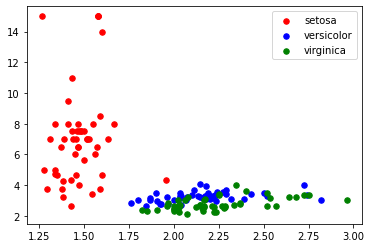

In [ ]:
plt.scatter(df2[0][:50], df2[1][:50], s=30, c="r", label='setosa');
plt.scatter(df2[0][50:100], df2[1][50:100], s=30, c="b", label='versicolor');
plt.scatter(df2[0][100:150], df2[1][100:150], s=30, c="g", label='virginica');
plt.legend(loc='upper right')

# 4.2

K Means++ differens only in the way of initializing the centroids. Since the clusters formed are sensistive to initial centroid selection K-Means++ gives better result.
In K Means++ Point which is farthest from its nearest centroid has highest rpobability of getting selected.

## Reference : K-Means++ on Wiki : https://en.wikipedia.org/wiki/K-means%2B%2B

The exact algorithm is as follows:

1.   Choose one center uniformly at random among the data points.
2.   For each data point x not chosen yet, compute D(x), the distance between x and the nearest center that has already been chosen.
3.  Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2.( Choose point fartherst from its nearest centroid)
4. Repeat Steps 2 and 3 until k centers have been chosen.
5. Now that the initial centers have been chosen, proceed using standard k-means clustering.



    
    
   
    
    

In [ ]:
# Return Euclidean Distance
def euDist(p1, p2):
    return np.sum((p1 - p2)**2)

a=euDist(np.array([0,0]),np.array([2,2]))
print(a)

8


In [ ]:
x_data=df2.iloc[:,:2]
x_data
data=x_data.to_numpy()

centroids=[]
centroids.append(data[np.random.randint(data.shape[0]), :])
# plot(data, np.array(centroids))

In [ ]:
data[2, :]

array([1.46875, 6.5    ])

In [ ]:
## Get K centroids via K-Means++ Selection
def get_centroids_kmeans(data,k):
  centroid_list=[]
  ## get any random centroid to begin with
  centroid_list.append(data[np.random.randint(data.shape[0]), :])
  # plot(data, np.array(centroid_list))

  ## Now for all other left over k-1 centroids
  for _ in range(k - 1):

    # for each point find the nearest centroid
    # from aboev points make the point which is farthest from its nearest centroid as the next centroid
    # Essentially with largest(distance from nearest centroid)
    dist = []
    for i in range(data.shape[0]):
      point = data[i, :]
      d = sys.maxsize
      
      # for this given point find find closest centroid 
      for j in range(len(centroid_list)):
        temp = euDist(point, centroid_list[j])
        d = min(d, temp)
      dist.append(d)
             
    #Now from the dist. vector find the one which is Max
    dist = np.array(dist)
    # print(f"apoc->{dist.shape}")
    next_centroid = data[np.argmax(dist), :]
    centroid_list.append(next_centroid)
    dist = []

  return centroid_list
  # plot(data, np

In [ ]:
cents=get_centroids_kmeans(data,5)
print(cents)

[array([2.23076923, 3.33333333]), array([ 1.26829268, 15.        ]), array([1.41176471, 9.5       ]), array([1.57142857, 6.5       ]), array([1.34210526, 4.75      ])]


In [ ]:
def kmeans(X, k, cent_vec, max_iter=-1):  
    diff = 1  
    cluster = np.zeros(X.shape[0])  
    centroids = cent_vec
    ## While a change in centroids in present keep running 
    iter_count=0 
    while diff:
        if(max_iter>0 and iter_count>max_iter):
          break;   
        # for each row
        for i, row in enumerate(X):         
            mn_dist = float('inf')        
            # find the dist of each point(row) from all centroids        
            for idx, centroid in enumerate(centroids):            
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)            
                # store closest centroid            
                if mn_dist > d:               
                    mn_dist = d               
                    cluster[i] = idx

        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values     
        # if there is no change notices in centroid then stop    
        if np.count_nonzero(centroids-new_centroids) == 0:        
            diff = 0      
        else:        
            centroids = new_centroids
        iter_count=iter_count+1  
    # # print(cluster.shape)
    # print(f"rounds {iter_count}")
    return centroids, cluster

## Now combine above Centroid Selection with K means to Form K-Means++

For K=3

In [ ]:
centroids = get_centroids_kmeans(data, k = 3)
cents,clustered = kmeans(data,3,centroids)

rounds 2


In [ ]:
print(centroids)
print(clustered)

[array([2.22580645, 2.57142857]), array([ 1.26829268, 15.        ]), array([1.58823529, 8.5       ])]
[2. 2. 2. 2. 2. 0. 0. 2. 2. 1. 2. 2. 1. 2. 2. 0. 0. 0. 2. 0. 2. 0. 0. 0.
 2. 2. 0. 2. 2. 2. 2. 0. 1. 2. 1. 2. 2. 1. 2. 2. 0. 0. 2. 0. 0. 0. 2. 2.
 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [ ]:
c1=np.where(clustered==2)
c2=np.where(clustered==1)
c3=np.where(clustered==0)

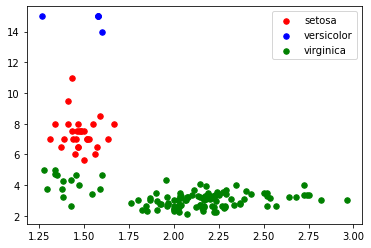

In [ ]:
plt.scatter(df2[0].iloc[c1], df2[1].iloc[c1], s=30, c="r", label='setosa');
plt.scatter(df2[0].iloc[c2], df2[1].iloc[c2], s=30, c="b", label='versicolor');
plt.scatter(df2[0].iloc[c3], df2[1].iloc[c3], s=30, c="g", label='virginica');
plt.legend(loc='upper right')

# 4.3

### For the accuracy metric I am using WCSS/Elbow Plot to show accuracy 
Reference Article : https://towardsdatascience.com/k-means-clustering-explain-it-to-me-like-im-10-e0badf10734a

It uses the square distance between point and its cluster as a metric to analyse if the clustering has been done properly. 

Elbow method is one of the most popular method used to select the optimal number of clusters for a range of K. The Elbow point where the graph values start decreasing in a linear manner is called as elbow point and indicates the best value of K.

In [ ]:
# just given the sum of distance of points from their assigned clusters
def calculate_cost(X, centroids, cluster):
    sum = 0  
    for i, row in enumerate(X):    
        sum += np.sqrt((centroids[int(cluster[i]), 0]-row[0])**2 +(centroids[int(cluster[i]), 1]-row[1])**2)  
    return sum

In [ ]:
data.shape

(150, 2)

In [ ]:
cost_vec=[]
for k in [1,2,3,4,5]:
  cents=get_centroids_kmeans(data,k)
  cents_final,clustered = kmeans(data,3,cents,50)
  cst=calculate_cost(data,cents_final,clustered)
  cost_vec.append(cst)

rounds 2
rounds 3
rounds 3
rounds 4
rounds 6


In [ ]:
cost_vec

[293.53100461798556,
 213.41572458749565,
 89.32454880632915,
 79.00935412016476,
 69.71959553264657]

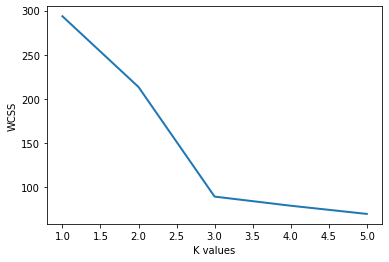

In [ ]:
plt.plot([1,2,3,4,5], cost_vec, linewidth=2.0)
plt.xlabel('K values')
plt.ylabel('WCSS')
plt.show()

# 4.4

## We can see from Elbow Graph K=3 is the Elbow Point hence the best value of K
It uses the square distance between points and its cluster as a metric to analyse if the clustering has been done properly.

Elbow method is one of the most popular method used to select the optimal number of clusters for a range of K. The Elbow point where the graph values start decreasing in a linear manner is called as elbow point and indicates the best value of K.

In [ ]:
data.shape

(150, 2)

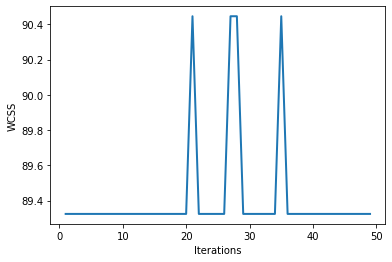

In [ ]:
cost_vec_iter=[]
for iters in range(1,50):
  cents=get_centroids_kmeans(data,3)
  cents_final,clustered = kmeans(data,3,cents,iters)
  cst=calculate_cost(data,cents_final,clustered)
  cost_vec_iter.append(cst)

plt.plot(range(1,50), cost_vec_iter, linewidth=2.0)
plt.xlabel('Iterations')
plt.ylabel('WCSS')
plt.show()

### 4.4 (b)

### Already done above 4.3 section. Just repeating here again

In [ ]:
centroids = get_centroids_kmeans(data, k = 3)
cents,clustered = kmeans(data,3,centroids)

In [ ]:
c1=np.where(clustered==2)
c2=np.where(clustered==1)
c3=np.where(clustered==0)

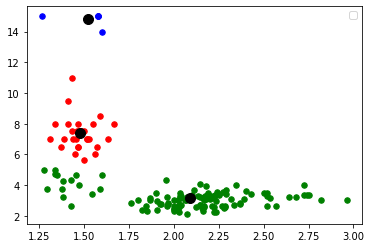

In [ ]:
plt.scatter(df2[0].iloc[c1], df2[1].iloc[c1], s=30, c="r");
plt.scatter(df2[0].iloc[c2], df2[1].iloc[c2], s=30, c="b");
plt.scatter(df2[0].iloc[c3], df2[1].iloc[c3], s=30, c="g");
## Plot Centroid
plt.scatter([cents[0][0],cents[1][0],cents[2][0]],[cents[0][1],cents[1][1],cents[2][1]],s=100, c="black")
plt.legend(loc='upper right')

In [ ]:
def preprocess(dir):
    # To deal with the error when there is [] in the path
    dir.replace('[','[[]')
    dir.replace(']','[]]')
    return dir

########        YOUR CODE        #######
your_ipynb_file_dir = '/content/gdrive/MyDrive/Purdue/SEM1/CS 529/Assignments/A2/Problem4.ipynb' # insert Your Path

!jupyter nbconvert --to html '{preprocess(your_ipynb_file_dir)}'

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Purdue/SEM1/CS 529/Assignments/A2/Problem4.ipynb to html
[NbConvertApp] Writing 408492 bytes to /content/gdrive/MyDrive/Purdue/SEM1/CS 529/Assignments/A2/Problem4.html
